In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = plt.imread('PNG MiTu.png')

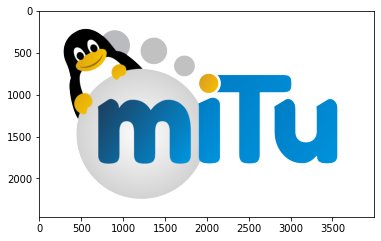

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(2459, 4000, 4)

In [ ]:
# read the dataset
from keras.datasets import mnist

In [ ]:
# load the data in variables
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
x_train[0].shape

(28, 28)

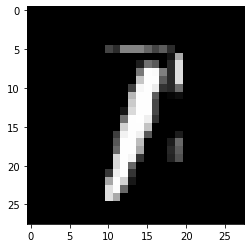

In [ ]:
plt.imshow(x_train[67], cmap='gray')

In [ ]:
y_train[67]

1

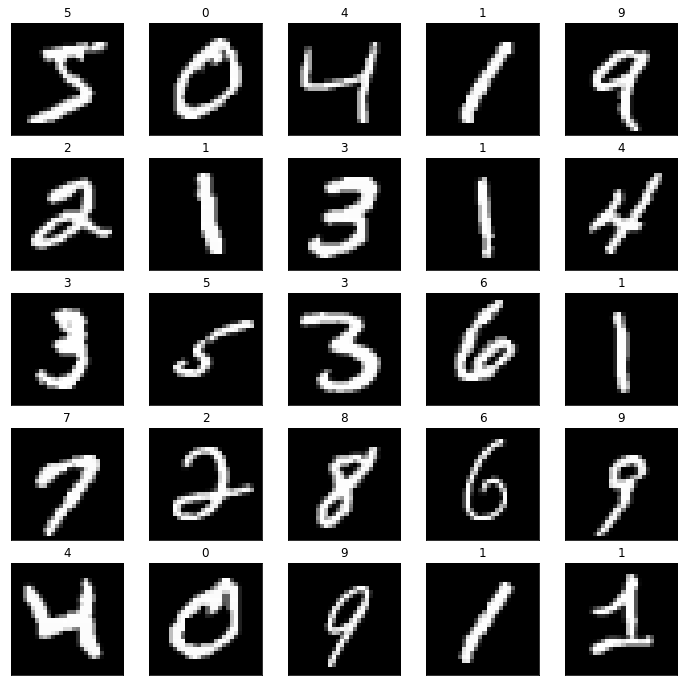

In [ ]:
# Explore the images
plt.figure(figsize=(12, 12))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(y_train[i])
  plt.xticks([])
  plt.yticks([])

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x = np.array([[5,6],[6,7],[0,3]])

In [ ]:
x

array([[5, 6],
       [6, 7],
       [0, 3]])

In [ ]:
x.shape

(3, 2)

In [ ]:
x = x.flatten()

In [ ]:
x

array([5, 6, 6, 7, 0, 3])

In [ ]:
x.shape

(6,)

In [ ]:
x = x.reshape(3,2)
x.shape

(3, 2)

In [ ]:
x = x.reshape(6)
x.shape

(6,)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
num_pixels = x_train.shape[1] * x_train.shape[2]
num_pixels

784

In [ ]:
# Reshape / flatten the array
x_train = x_train.reshape(-1, num_pixels)

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
# Reshape / flatten the array
x_test = x_test.reshape(-1, num_pixels)
x_test.shape

(10000, 784)

In [ ]:
# Feature scaling / normalization
x_train = x_train / 255
x_test = x_test / 255

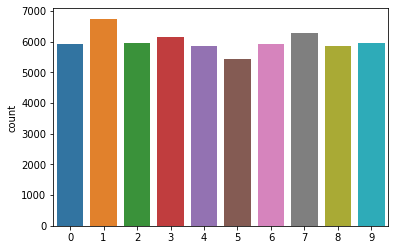

In [ ]:
import seaborn as sns
sns.countplot(x = y_train)

In [ ]:
y_train.shape

(60000,)

In [ ]:
# one hot encoding
from keras.utils import to_categorical

In [ ]:
x = np.array([0,4,3,1,2,2,2,1,2,3,3,0,2,1])
to_categorical(x)

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
# Create the object of ANN / DNN
model = Sequential()

# Add the input layer
model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))

# Add the hidden layer
model.add(Dense(128, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 717,210
Trainable params: 717,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the algorithm with given data
model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 19s 3ms/step - loss: 0.1859 - accuracy: 0.9434
Epoch 2/10
6000/6000 [==============================] - 15s 2ms/step - loss: 0.0902 - accuracy: 0.9727
Epoch 3/10
6000/6000 [==============================] - 15s 2ms/step - loss: 0.0629 - accuracy: 0.9807
Epoch 4/10
6000/6000 [==============================] - 15s 2ms/step - loss: 0.0516 - accuracy: 0.9849
Epoch 5/10
6000/6000 [==============================] - 15s 2ms/step - loss: 0.0422 - accuracy: 0.9876
Epoch 6/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0363 - accuracy: 0.9893
Epoch 7/10
6000/6000 [==============================] - 15s 2ms/step - loss: 0.0337 - accuracy: 0.9901
Epoch 8/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0313 - accuracy: 0.9912
Epoch 9/10
6000/6000 [==============================] - 15s 2ms/step - loss: 0.0280 - accuracy: 0.9922
Epoch 10/10
6000/6000 [==============================] - 14s 2ms/step - l

In [ ]:
# Evaluate the model on test / unseen data
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 21s 2ms/step - loss: 0.1183 - accuracy: 0.9799


[0.11825776100158691, 0.9799000024795532]

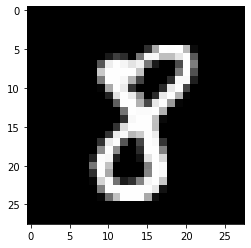

In [ ]:
# Prediction on an image
plt.imshow(x_test[134].reshape(28,28), cmap='gray')

In [ ]:
x_test[134].shape

(784,)

In [ ]:
new = x_test[134].reshape(1,784)

In [ ]:
new.shape

(1, 784)

In [ ]:
pred = model.predict(new)

1/1 [==============================] - 0s 101ms/step


In [ ]:
np.argmax(pred)

8